# Hotel Booking Cancelation Classification
**By: Sarah Alabdulwahab & Asma Althakafi**
> Our goal is to classify the customers that will cancel their hotel booking and those that will not.

> In addition, we aim to perform 6 experiments:
1. Fit the models on the data with all observations and features.
2. Fit the models on the data with all features and downsampling of the negative observations.
3. Fit the models on the data with selected features based on our interpretation.
4. Fit the models on the data with selected features using Random Forest Feature Importance (MDI).
5. Fit the models on the data with selected features using Permutation Importance.
6. Fit the models on the data with selected features using Exhaustive Feature Selection.

In [1]:
# supress warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# data manipulation imports
import pandas as pd
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.inspection import permutation_importance
from mlxtend.feature_selection import ExhaustiveFeatureSelector

## Hotel Booking Data

In [2]:
bookings_df = pd.read_csv("hotel_bookings_clean.csv")   
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,stay_nights,total_people
0,Resort Hotel,0,7,2015,July,27,1,BB,United Kingdom of Great Britain and Northern I...,Direct,...,C,0,No Deposit,0,Transient,75.0,0,0,1,1.0
1,Resort Hotel,0,13,2015,July,27,1,BB,United Kingdom of Great Britain and Northern I...,Corporate,...,A,0,No Deposit,0,Transient,75.0,0,0,1,1.0
2,Resort Hotel,0,14,2015,July,27,1,BB,United Kingdom of Great Britain and Northern I...,Online TA,...,A,0,No Deposit,0,Transient,98.0,0,1,2,2.0
3,Resort Hotel,0,0,2015,July,27,1,BB,Portugal,Direct,...,C,0,No Deposit,0,Transient,107.0,0,0,2,2.0
4,Resort Hotel,0,9,2015,July,27,1,FB,Portugal,Direct,...,C,0,No Deposit,0,Transient,103.0,0,1,2,2.0


## Encode the Categorical Variables 

In [3]:
cat_features = list(bookings_df.select_dtypes(include= ['object']).columns)

In [4]:
#this dataset is for experiment 1
encoded_bookings_df = bookings_df.copy()

for col in cat_features:
    le = preprocessing.LabelEncoder()
    le.fit(encoded_bookings_df[col])
    encoded_bookings_df[col] = list(le.transform(encoded_bookings_df[col])) 

print('The dataset for the first experiment contains', encoded_bookings_df.shape[0],'observations and', 
      encoded_bookings_df.shape[1],'features')

encoded_bookings_df.head()

The dataset for the first experiment contains 81229 observations and 25 features


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,stay_nights,total_people
0,1,0,7,2015,5,27,1,0,87,3,...,2,0,0,0,2,75.0,0,0,1,1.0
1,1,0,13,2015,5,27,1,0,87,2,...,0,0,0,0,2,75.0,0,0,1,1.0
2,1,0,14,2015,5,27,1,0,87,6,...,0,0,0,0,2,98.0,0,1,2,2.0
3,1,0,0,2015,5,27,1,0,67,3,...,2,0,0,0,2,107.0,0,0,2,2.0
4,1,0,9,2015,5,27,1,1,67,3,...,2,0,0,0,2,103.0,0,1,2,2.0


## Classification

### Correlation between the features

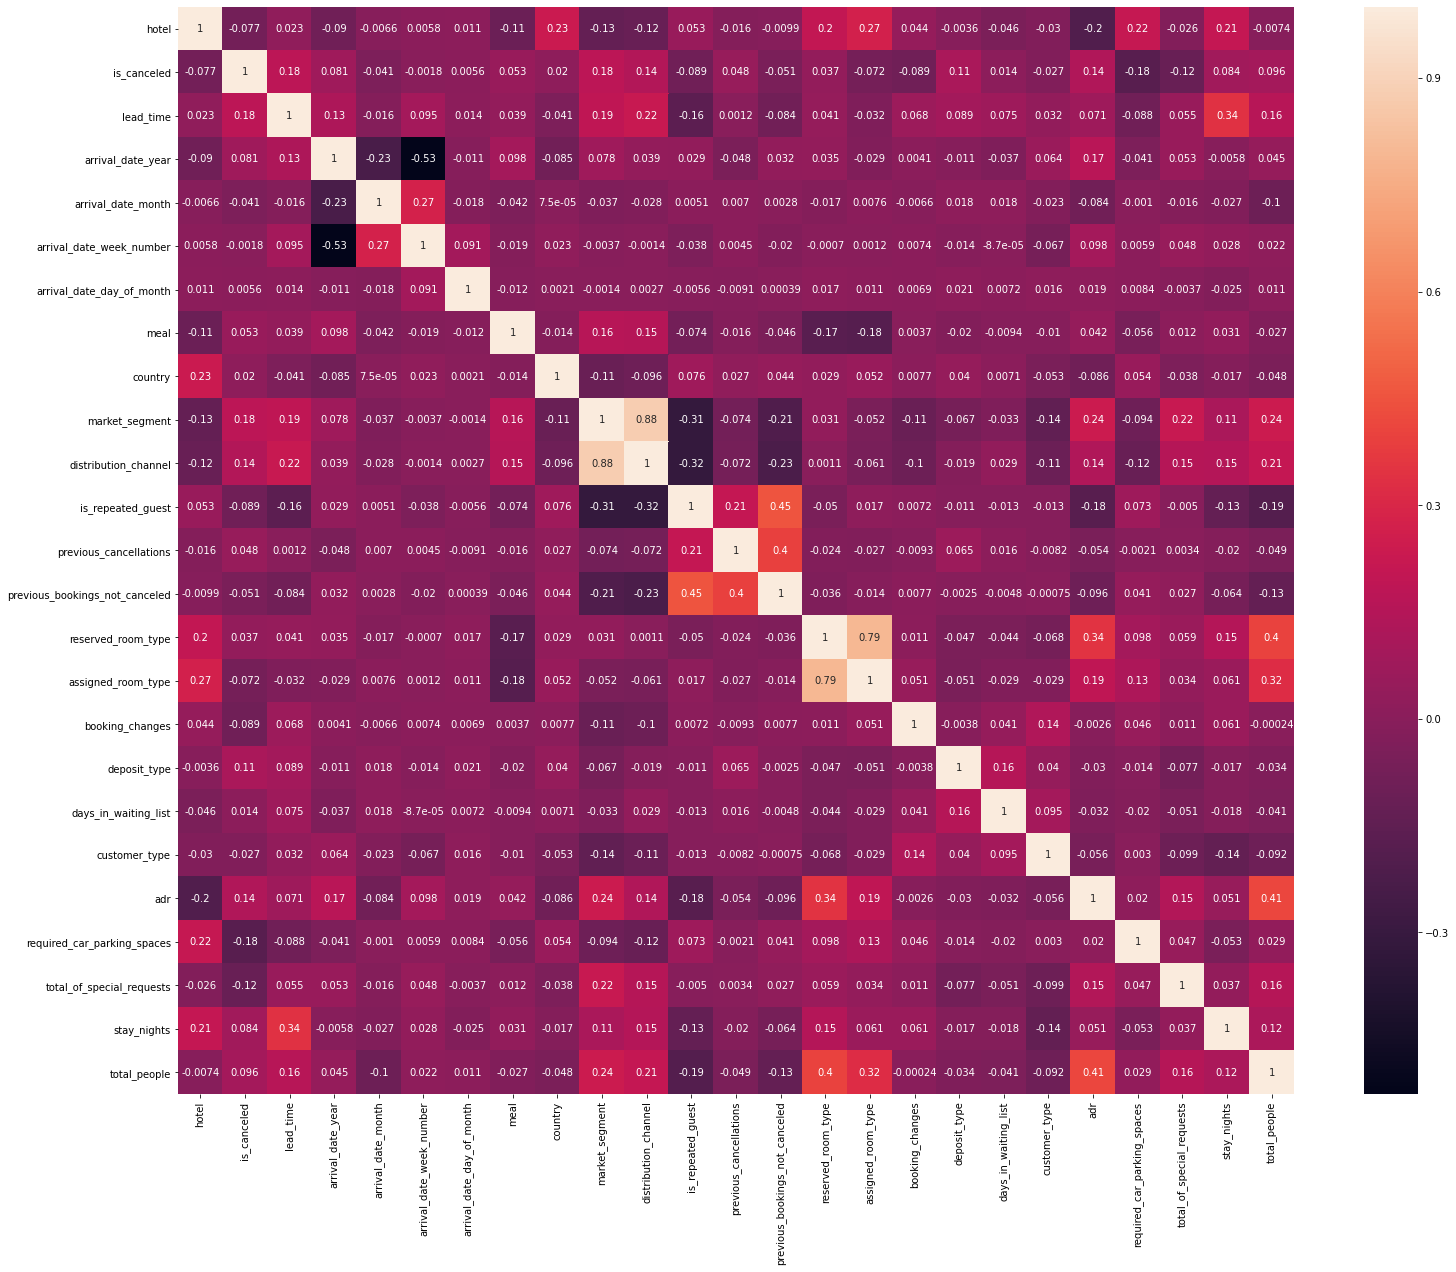

In [5]:
plt.figure(figsize=(25,20))
sns.heatmap(encoded_bookings_df.corr(), annot=True);

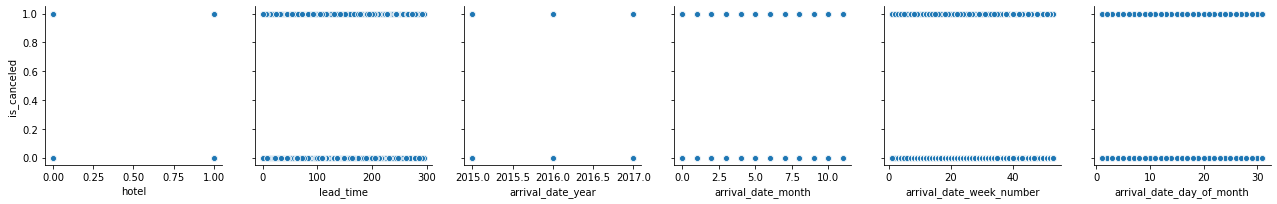

In [6]:
sns.pairplot(encoded_bookings_df, x_vars=['hotel', 'lead_time', 'arrival_date_year','arrival_date_month',
                                          'arrival_date_week_number','arrival_date_day_of_month'],
             y_vars=['is_canceled'], height= 3, aspect=1);

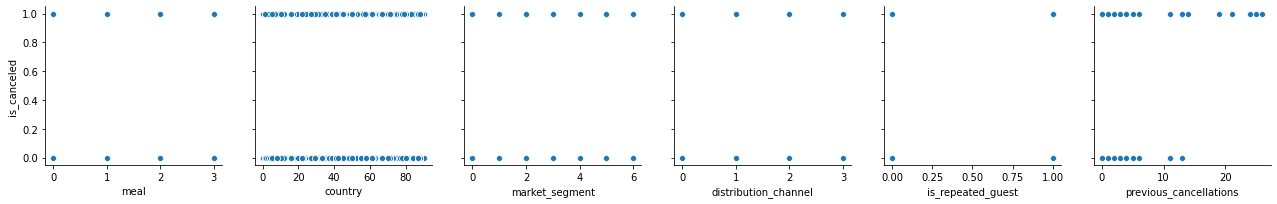

In [7]:
sns.pairplot(encoded_bookings_df, x_vars=['meal', 'country','market_segment','distribution_channel','is_repeated_guest',
                                          'previous_cancellations'],y_vars=['is_canceled'], height= 3, aspect=1);

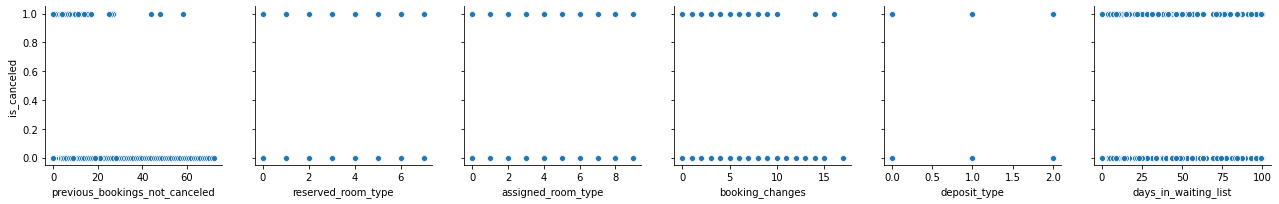

In [8]:
sns.pairplot(encoded_bookings_df, x_vars=['previous_bookings_not_canceled','reserved_room_type','assigned_room_type',
                                          'booking_changes', 'deposit_type', 'days_in_waiting_list'],
             y_vars=['is_canceled'], height= 3, aspect=1);

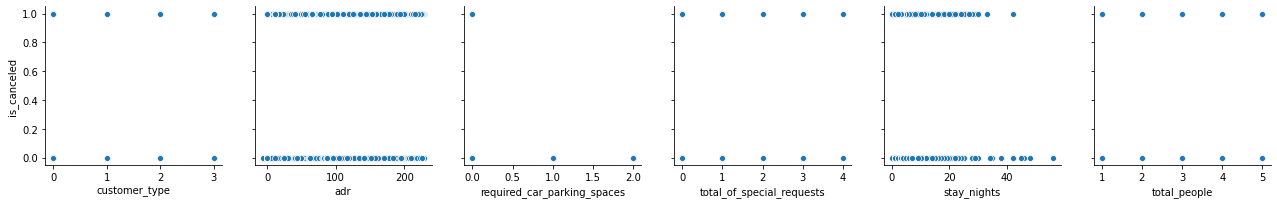

In [9]:
sns.pairplot(encoded_bookings_df, x_vars=['customer_type','adr','required_car_parking_spaces', 'total_of_special_requests',
                                          'stay_nights','total_people'],y_vars=['is_canceled'], height= 3, aspect=1);

### Splitting the data - Train and Test

In [10]:
def split_data(df, X):
    y = df['is_canceled']
    
    #split 80% of the data to the training set while 20% of the data to test set
    return train_test_split(X, y, test_size=0.2) 

### K Neighbors Classifier

In [11]:
def KNN(X_train, X_test, y_train, y_test):
    param_grid = dict(n_neighbors = [3,5,7,9])
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring= 'f1_weighted')
    grid.fit(X_train, y_train);

    model = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_neighbors']]

### Logistic Regression

In [12]:
def LogReg(X_train, X_test, y_train, y_test):
    param_grid = dict(C = np.linspace(0,1,10)[1:])
    grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train);
    
    model = LogisticRegression(C = grid.best_params_['C'], solver='liblinear')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'],
             model.score(X_train, y_train),  grid.best_params_['C']]

### Decision Tree Classifier

In [13]:
def DTree(X_train, X_test, y_train, y_test):
    param_grid = dict(max_depth = range(1,20))
    grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted')
    grid.fit(X_train, y_train);
    
    model = DecisionTreeClassifier(max_depth= grid.best_params_['max_depth'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['max_depth']]

### Naive Bayes

In [14]:
def NB(X_train, X_test, y_train, y_test):
    param_grid = dict(alpha = np.linspace(0,1,10)[1:])
    grid = GridSearchCV(BernoulliNB(), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train); 
   
    model = BernoulliNB(alpha = grid.best_params_['alpha'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['alpha']]

### Random Forest Classifier

In [15]:
def RandForest(X_train, X_test, y_train, y_test, depth):
    param_grid = dict(n_estimators = [5,15,25,35])
    grid = GridSearchCV(RandomForestClassifier(max_depth = depth), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train); 
    
    model = RandomForestClassifier(max_depth = depth, n_estimators = grid.best_params_['n_estimators'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_estimators']]

### Gradient Boosting Classifier

In [16]:
def GradientBoosting(X_train, X_test, y_train, y_test, depth):
    param_grid = dict(n_estimators = [5,15,25,35])
    grid = GridSearchCV(GradientBoostingClassifier(max_depth = depth), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train);
    
    model = GradientBoostingClassifier(max_depth=depth,  n_estimators = grid.best_params_['n_estimators'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_estimators']]

### Bagging Classifier

We tried different base estimators which are K Neighbors, Logistic Regression, Decision Tree, and Naive Bayes and we found that Decision Tree was the best 

In [17]:
def Bagging(X_train, X_test, y_train, y_test, depth):
    param_grid = dict(base_estimator = [DecisionTreeClassifier(max_depth=depth)] , n_estimators = [5,15,25,35])
    grid = GridSearchCV(BaggingClassifier(), param_grid, cv=5, scoring='f1_weighted')
    grid.fit(X_train, y_train)
    
    model = BaggingClassifier(base_estimator = grid.best_params_['base_estimator'], n_estimators = grid.best_params_['n_estimators']) 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_estimators']]

### Ada Boost Classifier

We tried different base estimators which are K Neighbors, Logistic Regression, Decision Tree, and Naive Bayes and we found that Decision Tree was the best 

In [18]:
def AdaBoost(X_train, X_test, y_train, y_test, depth):
    param_grid = dict(base_estimator = [DecisionTreeClassifier(max_depth=depth)], n_estimators = [5,15,25,35])
    grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train)
    
    model = AdaBoostClassifier(base_estimator = grid.best_params_['base_estimator'], n_estimators = grid.best_params_['n_estimators'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_estimators']]

### Collecting All Results

In [19]:
def get_results(X_train, X_test, y_train, y_test):
    knn = KNN(X_train, X_test, y_train, y_test)
    lr = LogReg(X_train, X_test, y_train, y_test)
    dt =  DTree(X_train, X_test, y_train, y_test)
    nb = NB(X_train, X_test, y_train, y_test)
    rf = RandForest(X_train, X_test, y_train, y_test, dt[5])
    gb = GradientBoosting(X_train, X_test, y_train, y_test, dt[5])
    bag = Bagging(X_train, X_test, y_train, y_test, dt[5])
    ab = AdaBoost(X_train, X_test, y_train, y_test, dt[5])
    
    return pd.DataFrame(data = [knn, lr, dt, nb, rf, gb, bag, ab], 
                        columns=['Accuracy','Precision','Recall','F1', 'Train Accuracy', 'Best Params'],
                        index = ['K Neighbors','Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 
                                 'Gradient Boosting', 'Bagging','Ada Boost'])

### Training Classification Models

**Experiment 1 - Fit the models on the data with all observations and features.**

In [20]:
X = encoded_bookings_df.drop(columns=['is_canceled'])
X_train_1, X_test_1, y_train_1, y_test_1 = split_data(encoded_bookings_df, X)

In [21]:
results_exp1 = get_results(X_train_1, X_test_1, y_train_1, y_test_1)
results_exp1.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1,Train Accuracy,Best Params
Gradient Boosting,0.839653,0.833584,0.839653,0.833791,0.874383,35.000000
Bagging,0.825003,0.817762,0.825003,0.818819,0.830756,25.000000
Decision Tree,0.819956,0.813919,0.819956,0.815749,0.825108,11.000000
Ada Boost,0.815893,0.811954,0.815893,0.813547,0.874983,5.000000
Random Forest,0.807399,0.799687,0.807399,0.786786,0.811735,25.000000
Logistic Regression,0.770897,0.753040,0.770897,0.735007,0.772971,0.555556
K Neighbors,0.729718,0.710537,0.729718,0.716906,0.815844,5.000000
Naive Bayes,0.750585,0.724670,0.750585,0.691039,0.752135,0.111111


**Experiment 2 - Fit the models on the data with all features and downsampling of the negative observations.**

We did this to balance the classes

In [22]:
encoded_bookings_df['is_canceled'].value_counts()

0    59494
1    21735
Name: is_canceled, dtype: int64

In [23]:
encoded_sample_bookings_df = pd.concat([encoded_bookings_df.query('is_canceled == 0').sample(21735), encoded_bookings_df.query('is_canceled == 1').sample(21735)])

In [24]:
X = encoded_sample_bookings_df.drop(columns=['is_canceled'])
X_train_2, X_test_2, y_train_2, y_test_2 = split_data(encoded_sample_bookings_df, X)

In [25]:
results_exp2 = get_results(X_train_2, X_test_2, y_train_2, y_test_2)
results_exp2.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1,Train Accuracy,Best Params
Gradient Boosting,0.811594,0.813342,0.811594,0.811364,0.914136,35.000000
Bagging,0.798367,0.801659,0.798367,0.797866,0.834254,35.000000
Random Forest,0.796296,0.800176,0.796296,0.795692,0.820163,35.000000
Decision Tree,0.776167,0.781069,0.776167,0.775262,0.810386,12.000000
Ada Boost,0.760179,0.761129,0.760179,0.759999,0.905280,5.000000
Logistic Regression,0.708650,0.712453,0.708650,0.707459,0.702582,0.777778
K Neighbors,0.664711,0.666109,0.664711,0.664114,0.734903,9.000000
Naive Bayes,0.640557,0.652330,0.640557,0.633874,0.643490,0.777778


**Experiment 3 - Fit the models on the data with selected features based on our interpretation.**

In [26]:
selected_features = ['hotel','arrival_date_month', 'meal', 'country','distribution_channel', 'previous_cancellations','stay_nights', 'total_people']

X = encoded_bookings_df[selected_features]
X_train_3, X_test_3, y_train_3, y_test_3 = split_data(encoded_bookings_df, X)

In [27]:
results_exp3 = get_results(X_train_3, X_test_3, y_train_3, y_test_3)
results_exp3.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1,Train Accuracy,Best Params
Bagging,0.750708,0.722079,0.750708,0.718776,0.812736,35.000000
Gradient Boosting,0.741967,0.712131,0.741967,0.714166,0.824585,35.000000
K Neighbors,0.737720,0.708885,0.737720,0.713162,0.773556,9.000000
Random Forest,0.753108,0.724599,0.753108,0.712805,0.800840,15.000000
Ada Boost,0.729533,0.705339,0.729533,0.712002,0.827047,15.000000
Decision Tree,0.743568,0.711512,0.743568,0.710010,0.800609,17.000000
Naive Bayes,0.743014,0.779881,0.743014,0.645418,0.741886,0.111111
Logistic Regression,0.734704,0.700725,0.734704,0.629907,0.734684,1.000000


**Experiment 4 - Fit the models on the data with selected features using Random Forest Feature Importance (MDI).**

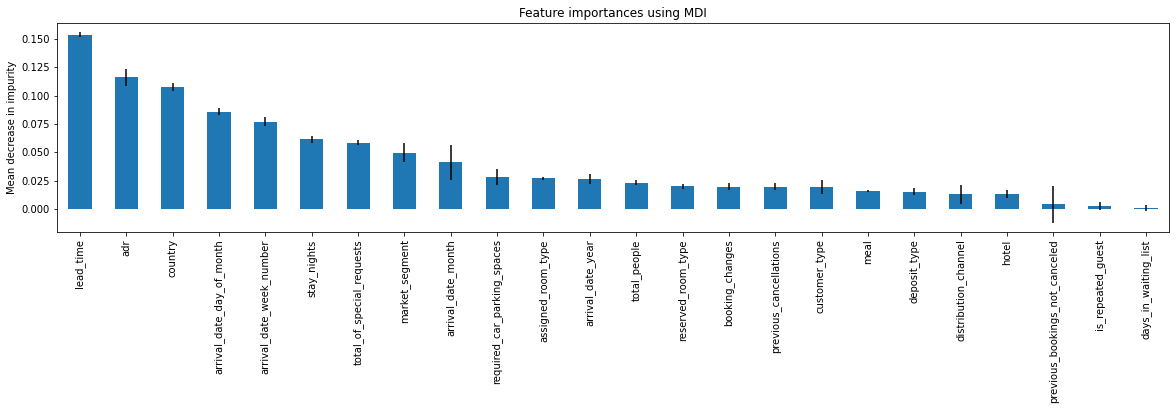

In [28]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_1, y_train_1)

importances = forest.feature_importances_
feature_names = list(X_train_1.columns)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False, inplace=True)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

In [29]:
X = encoded_bookings_df[list(forest_importances[:10].index)]
X_train_4, X_test_4, y_train_4, y_test_4 = split_data(encoded_bookings_df, X)

In [30]:
results_exp4 = get_results(X_train_4, X_test_4, y_train_4, y_test_4)
results_exp4.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1,Train Accuracy,Best Params
Gradient Boosting,0.808691,0.800211,0.808691,0.802137,0.866365,35.000000
Bagging,0.803829,0.794577,0.803829,0.796599,0.824231,35.000000
Decision Tree,0.794349,0.786858,0.794349,0.789457,0.816475,11.000000
Random Forest,0.800259,0.788432,0.800259,0.788252,0.816060,35.000000
Ada Boost,0.785793,0.779504,0.785793,0.782000,0.851854,5.000000
K Neighbors,0.732180,0.706818,0.732180,0.713181,0.796408,7.000000
Logistic Regression,0.756617,0.732072,0.756617,0.708528,0.755121,1.000000
Naive Bayes,0.733534,0.538073,0.733534,0.620781,0.732145,0.111111


**Experiment 5 - Fit the models on the data with selected features using Permutation Importance.**

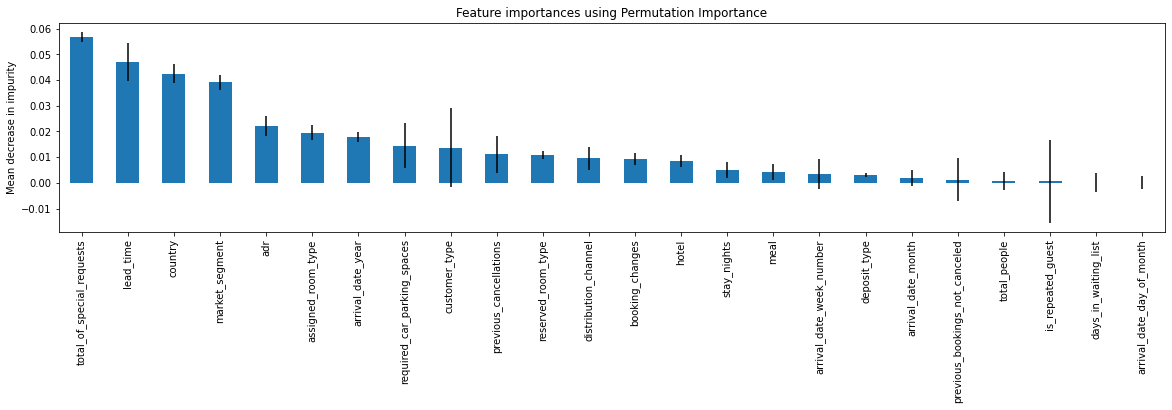

In [32]:
result = permutation_importance(forest, X_test_1, y_test_1, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=X_test_1.columns)
forest_importances.sort_values(ascending=False, inplace=True)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Permutation Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

In [33]:
X = encoded_bookings_df[list(forest_importances[:10].index)]
X_train_5, X_test_5, y_train_5, y_test_5 = split_data(encoded_bookings_df, X)

In [34]:
results_exp5 = get_results(X_train_5, X_test_5, y_train_5, y_test_5)
results_exp5.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1,Train Accuracy,Best Params
Gradient Boosting,0.816139,0.808721,0.816139,0.810303,0.856270,35.000000
Bagging,0.811030,0.803619,0.811030,0.805532,0.826801,35.000000
Ada Boost,0.803336,0.798553,0.803336,0.800452,0.857917,5.000000
Decision Tree,0.802105,0.794517,0.802105,0.796803,0.820892,11.000000
Random Forest,0.803829,0.792989,0.803829,0.792122,0.818830,35.000000
K Neighbors,0.729410,0.707657,0.729410,0.714008,0.798547,7.000000
Logistic Regression,0.757602,0.736172,0.757602,0.711142,0.761230,0.666667
Naive Bayes,0.736920,0.734221,0.736920,0.638285,0.741255,0.111111


**Experiment 6 - Fit the models on the data with selected features using Exhaustive Feature Selection.**

Unfortunately, this section of code took more than 12 hours to run and still did not produce an output

In [35]:
#efs = ExhaustiveFeatureSelector(GradientBoostingClassifier(max_depth=11,  n_estimators = 35) ,min_features = 10, max_features = 10, scoring = 'f1_weighted')
#efs.fit(X_train_1, y_train_1)
#print('Best Features:',efs.best_feature_names_)
#print('Best Score:',efs.best_score_)

In [36]:
#Best_Features = list(efs.best_feature_names_)

In [37]:
#X = encoded_bookings_df[Best_Features]
#X_train_6, X_test_6, y_train_6, y_test_6 = split_data(encoded_bookings_df, X)

In [38]:
#model = GradientBoostingClassifier(max_depth=11,  n_estimators = 35)
#model.fit(X_train_6, y_train_6);
#y_pred = model.predict(X_test_6)
#results =  metrics.classification_report(y_test_6, y_pred, output_dict = True)
#[results['accuracy'], results['weighted avg']['precision'], results['weighted avg']['recall'], results['weighted avg']['f1-score'], model.score(X_train_6, y_train_6)]